
Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación
Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

Práctico Análisis y Visualización
Integrantes:

Objetivos:
Normalizar el corpus generado en el práctico anterior, teniendo en cuenta los siguientes aspectos:

tokenización,
pasar a minúsculas,
separar puntuación,
stemming y lematización,
eliminar stopwords (o no),
eliminar las palabras con frecuencia menor a n.
Analizar las palabras más frecuentes de todo el corpus, por fuero y de 5 documentos. Compararlo con el resultado obtenido en el ejercicio anterior. Se observa algún cambio significativo?

Hacer una explicación con ejemplos tomando algunas palabras al azar entre lo que es stemming y lemmatizing para entender que nos da cada uno de estos procesos y cual es conveniente utilizar en cada caso.

Opcional:

Investigar que es Segmentación y compararlo con Tokenización. Ejemplificar con un documento.
Investigar NER (Named Entity Recognition - Reconocimiento de Entitades Nombradas). Buscar las Entidadas Nombradas mas frecuentes en todo el corpus y por fuero.
Fecha de Entrega: 4 de julio de 2021



In [2]:
import pandas as pd
import seaborn as sns
import os
import nltk
import matplotlib.pyplot as plt

In [3]:
dirname= "Corpus.txt"

f = open (dirname,'r', encoding="utf-8")
corpus=f.read()


Hay varios tokenizadores de acuerdo a el objetivo especifico que tengamos (Completar):

-WordSentTokenize

-WordPunctTokenizer

-WordTokenize

In [4]:
#Se generan los tokens sin signos de puntuacion
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
tokens=tokenizer.tokenize(corpus)
tokens=tokens[:10000]

Stopword el nombre que reciben las palabras sin significado como artículos, pronombres, preposiciones, etc (como "el", "a", "una", "en") que un motor de búsqueda ha sido programado para ignorar, tanto al indexar entradas para buscarlas como al recuperarlas. como resultado de una consulta de búsqueda. 

In [5]:
#Se les quitan los stopwords
clean_tokens = tokens[:]

for token in tokens:

    if token in stopwords.words('spanish'):

        clean_tokens.remove(token)


Se los pasa a minuscula

In [6]:
tokens_lower = [word.lower() for word in clean_tokens ]
tokens_lower[:20]

['auto',
 '122',
 't',
 '2',
 'f',
 '547',
 '552',
 'córdoba',
 'veinticuatro',
 'septiembre',
 'dos',
 'mil',
 'dieciocho',
 'y',
 'vistos',
 'estos',
 'autos',
 'caratulados',
 'a',
 'm']

El stemming consiste en quitar y reemplazar sufijos de la raíz de la palabra.Ej: La raíz de la palabra trabajando = > trabajo.

Los motores de búsqueda utilizan esta técnica al indexar páginas, puesto que muchas personas escriben versiones diferentes para la misma palabra y todas derivan de la palabra raíz.

Hay distintos metodos:

-PorterStemmer: Es el mas popular pero funciona mejor con palabras en Ingles

-LancasterStemmer



In [7]:
from nltk.stem import SnowballStemmer

spanish_stemmer = SnowballStemmer('spanish')


# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()


tokens_stemm=[spanish_stemmer.stem(word) for word in tokens_lower]
tokens_stemm[:20]

['aut',
 '122',
 't',
 '2',
 'f',
 '547',
 '552',
 'cordob',
 'veinticuatr',
 'septiembr',
 'dos',
 'mil',
 'diecioch',
 'y',
 'vist',
 'estos',
 'aut',
 'caratul',
 'a',
 'm']

La lemmatización implica hacer un análisis del vocabulario y su morfología para retornar la forma básica de la palabra (sin conjugar, en singular, etc).
El problema es que al menos hasta la fecha NLTK no tiene incorporada lemmatización para español.

In [8]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

tokens_lem=[lemmatizer.lemmatize(word) for word in tokens_stemm]
tokens_lem[:20]


['aut',
 '122',
 't',
 '2',
 'f',
 '547',
 '552',
 'cordob',
 'veinticuatr',
 'septiembr',
 'do',
 'mil',
 'diecioch',
 'y',
 'vist',
 'estos',
 'aut',
 'caratul',
 'a',
 'm']

1395

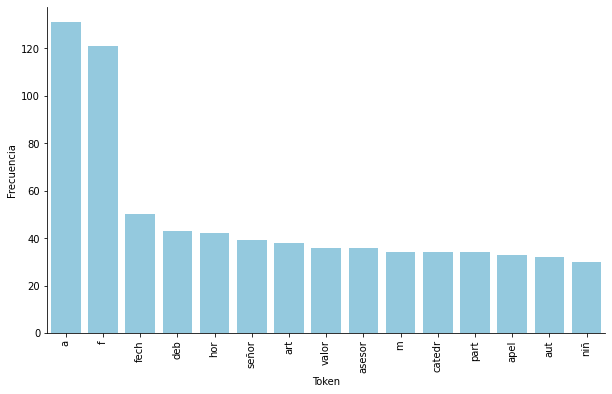

In [9]:
def tokens2dataframe(tokens):
    freq = nltk.FreqDist(tokens)
    data = pd.DataFrame(freq.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
    return data
def graph_frequency(dataframe):
    plt.figure(figsize=(10,6))
    sns.barplot(x=dataframe[:15].Token, y=dataframe[:15].Frecuencia, color='skyblue')
    plt.xticks(rotation=90)
    sns.despine()
data=tokens2dataframe(tokens_lem)
graph_frequency(data)
len(data)

122

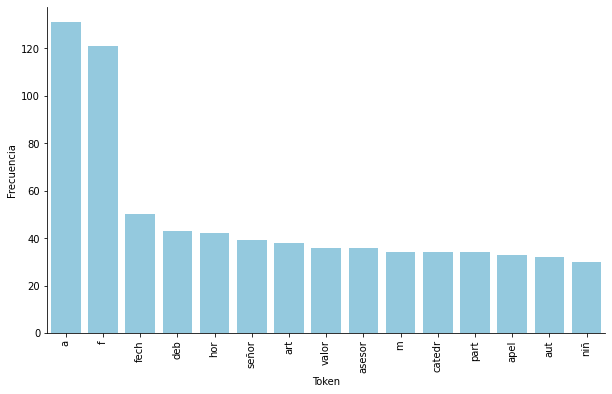

In [12]:
def delete_low_frecuency_words(dataframe, n):
    return dataframe[dataframe['Frecuencia']>n]
data= delete_low_frecuency_words(data,10)
graph_frequency(data)
len(data)